## 降低空间分辨率

### 有效方式：

skimage.transform  rescule() resize()

cv2.resize()

imageio拿到图片，然后手动隔行删除

PIL.Image resize()

### 存疑方式：

cv2.pyrDown()不管传的参数是几，图片的空间分辨率只能降低为原来的二分之一。

PIL.Image  save(设置dpi参数)  没成功，我的代码问题？ PIL 改为Pillow?


In [2]:
import cv2

In [5]:
"""降低空间分辨率,并重采样成原来大小
   参数：img  原图像
         ratio 空间分辨率降几倍
   返回： 降低分辨率之后和原来图像一样大小的新图像
"""
def spatial_resolution_down_1(img, ratio):
    h = img.shape[0]
    w = img.shape[1]
    p_img = cv2.resize(img, (int(h / ratio), int(w / ratio)))
    h1 = p_img.shape[0]
    w1 = p_img.shape[1]
    print(h1, w1)
    new_img = cv2.resize(p_img, (h1 * ratio, w1 * ratio), interpolation = cv2.INTER_AREA)
    cv2.imshow(str(h1) + '*' + str(w1), new_img)
    return new_img


In [6]:
img = cv2.imread('timg.jpg', 0)
#原始图像
print(img.shape[0], img.shape[1])
cv2.imshow('512*512', img)
spatial_resolution_down_1(img, 2)
spatial_resolution_down_1(img, 4)
spatial_resolution_down_1(img, 6)
cv2.waitKey(0)
cv2.destroyAllWindows()

256 256
128 128
85 85


以上代码结论：cv2.resize()函数能够正确按照比例降低空间分辨率

In [22]:
"""降低空间分辨率,并重采样成原来大小
   参数：img  原图像
         ratio 空间分辨率降几倍
   返回： 降低分辨率之后和原来图像一样大小的新图像
"""
def spatial_resolution_down_2(img, ratio):
    h = img.shape[0]
    w = img.shape[1]
    p_img = cv2.pyrDown(img, (int(h / ratio), int(w / ratio)))
    h1 = p_img.shape[0]
    w1 = p_img.shape[1]
    print(h1, w1)
    new_img = cv2.resize(p_img, (h, w), interpolation = cv2.INTER_AREA)
    cv2.imshow(str(ratio) + ':' +str(h1) + '*' + str(w1), new_img)
    return new_img

In [25]:
img = cv2.imread('timg.jpg', 0)
#原始图像
print(img.shape[0], img.shape[1])
# cv2.imshow('512*512', img)
spatial_resolution_down_2(img, 2)
spatial_resolution_down_2(img, 8)
spatial_resolution_down_2(img, 16)
cv2.waitKey(0)
cv2.destroyAllWindows()

512 512
256 256
256 256
256 256


以上代码结论：cv2.pyrDown()不管传的参数是几，图片的空间分辨率只能降低为原来的二分之一。

In [14]:
from PIL import Image
import cv2

"""降低空间分辨率,并重采样成原来大小
   参数：img  原图像
         ratio 空间分辨率降几倍
   返回： 降低分辨率之后和原来图像一样大小的新图像
"""
def spatial_resolution_down_4(img):

    image_s = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))   
    image_s.save('spatial resolution.jpg',dpi=(80, 80))
    spatial_r=cv2.imread('spatial resolution.jpg', 0)
    print(spatial_r.shape[0], spatial_r.shape[1])
    cv2.imshow('spatial resolution',spatial_r)
    
img = cv2.imread('timg.jpg', 0)
#原始图像
print(img.shape[0], img.shape[1])
cv2.imshow('512*512', img)
spatial_resolution_down_4(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

512 512
512 512


以上代码结论：PIL.Image  save()没成功，我的代码问题？

In [40]:
"""降低空间分辨率,并重采样成原来大小
   参数：img  原图像
         ratio 空间分辨率降几倍
   返回： 降低分辨率之后和原来图像一样大小的新图像
"""
def spatial_resolution_down_3(gray, ratio):
    #二. 固定灰度级数，降低该图像的空间分辨率，体会不同空间分辨率下图像的视觉效果
    #1. 在gray矩阵中，隔一行删一行，隔一列删一列
    new_gray1 = []
    shape1 = int(gray.shape[0]/ratio),int(gray.shape[1]/ratio)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if (i % ratio == 0) and (j % ratio == 0):
                new_gray1.append(gray[i][j])
    new_gray1 =np.array(new_gray1).reshape(shape1)
    plt.figure( figsize = (10,10))
    plt.imshow(new_gray1, cmap = plt.get_cmap(name = 'gray'))
    plt.title('空间分辨率为原灰度图像的' + str(ratio))
    plt.show()  
    print('修改后的灰度图像相关信息如下：')
    print('形状为',new_gray1.shape) #形状=（高，宽）
    print('尺寸为',new_gray1.size) #尺寸=高 * 宽


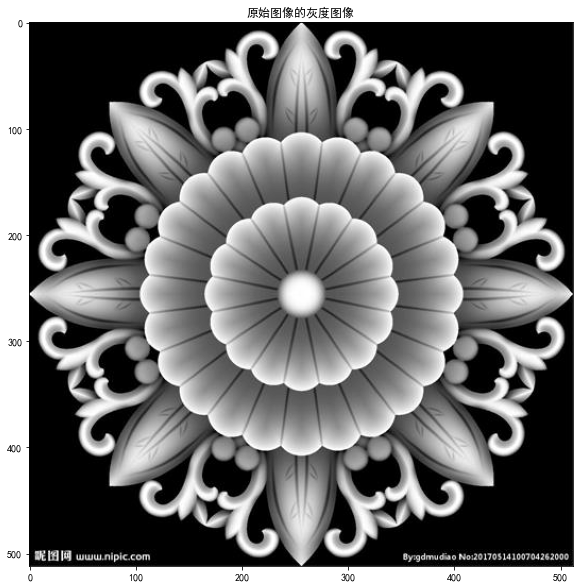

修改前的灰度图像相关信息如下：
形状为 (512, 512)
尺寸为 262144
灰度级数为 256


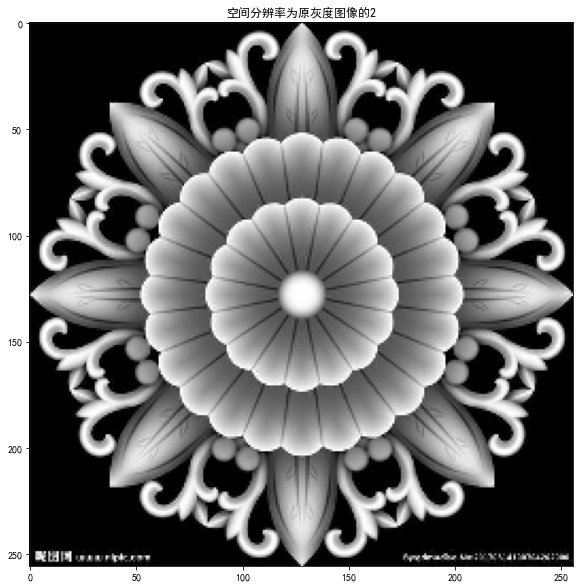

修改后的灰度图像相关信息如下：
形状为 (256, 256)
尺寸为 65536


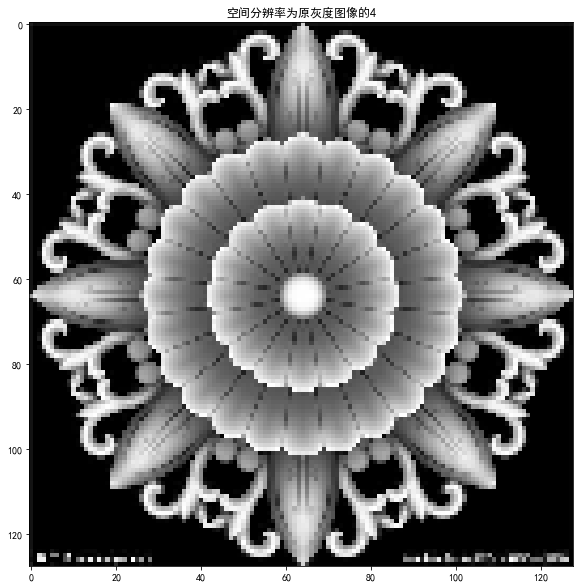

修改后的灰度图像相关信息如下：
形状为 (128, 128)
尺寸为 16384


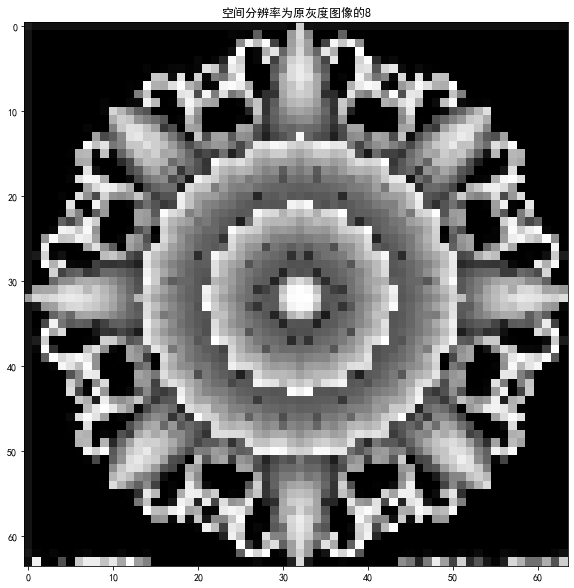

修改后的灰度图像相关信息如下：
形状为 (64, 64)
尺寸为 4096


In [44]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

#一.将原始彩色图像转化为空间分辨率足够大的灰度图像
# 1.读取原始的彩色图像
pic = imageio.imread('timg.jpg')
# 2.将原始彩色图像转化为灰度图像、并显示：灰度值=0.299R+0.587G+0.114B
gray1 = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray1(pic)  #gray:灰度图像
plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.title('原始图像的灰度图像')
plt.show()
print('修改前的灰度图像相关信息如下：')
print('形状为',gray.shape) #形状=（高，宽）
print('尺寸为',gray.size) #尺寸=高 * 宽
gray_series = int(gray.max() - gray.min() + 1)
print('灰度级数为',gray_series) 
spatial_resolution_down_3(gray, 2)
spatial_resolution_down_3(gray, 4)
spatial_resolution_down_3(gray, 8)
# spatial_resolution_down_3(gray, 6)


以上代码结论：速度很快,但只能传2、4、8这样的数，不能传3、6等数。

# 优秀

改变空间分辨率


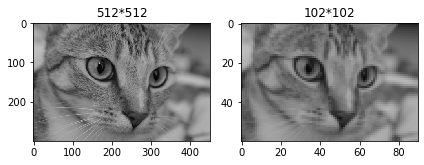

改变灰度分辨率


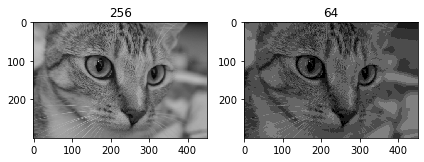

In [7]:
from skimage import io, data, color, img_as_ubyte
from skimage.transform import rescale
import matplotlib.pyplot as plt

#获取图像
img=data.chelsea()
#转换为灰度图像
img = color.rgb2gray(img)

print("改变空间分辨率")
#改变空间分辨率
img_rescaled = rescale(img, scale=(0.2, 0.2))
#可视化
plt.subplot(121)
io.imshow(img)
plt.title('512*512')
plt.subplot(122)
io.imshow(img_rescaled)
plt.title('102*102')
plt.show()


print("改变灰度分辨率")

#改变灰度分辨率
def change_gray_8(x):
    x = x*1000
    x = x//125
    return x / 10
#可视乎
img_gray = color.rgb2gray(img)
# print(img_gray)
plt.subplot(121)
io.imshow(img_gray)
plt.title('256')
rows,cols=img_gray.shape
for i in range(rows):
    for j in range(cols):
        img_gray[i,j] = change_gray_8(img_gray[i,j])
plt.subplot(122)
io.imshow(img_gray)
plt.title('64')
plt.show()

以上代码结论：skimage.transform rescale 有效

## 改变灰度分辨率

### 有效方式

手动修改像素点的值，如改为0和127，或改为[0,127]，或原来的四分之一、八分之一等

cv2读取图像后，手动改为8位深度的图，然后各个深度构成的图，逐个显示

### 存疑方式

cv2.cvtColor()

In [ ]:


"""降低灰度分辨率,减低灰度级数，变成二值图像
   参数：img  原图像
         ratio 灰度分辨率降几倍
   返回： 降低分辨率之后的新图像
"""
def two_image(img, ratio):
    new_img = img.copy()
    h, w = img.shape
    for x in range(h):
        for y in range(w):
            if img[x,y] < int(256/ratio):
                new_img[x,y] = 0
            else:
                new_img[x,y] = int(256/ratio)-1
    return new_img


"""降低灰度分辨率,减低灰度级数[针对每个像素]
   参数：img  原图像
         new_L 新的灰度级数
   返回： 降低分辨率之后的新图像
"""
def change_L(img, new_L):
    new_img = img.copy()
    h, w = img.shape
    for x in range(h):
        for y in range(w):
            pixels = img[x,y]
            new_img[x,y] = int(pixels/255*(new_L-1) + 0.5)
    return new_img


#2、固定灰度级数，降低该图像的空间分辨率，体会不同空间分辨率下图像的视觉效果
img = cv2.imread('timg.jpg', 0)
h = img.shape[0] #行
w = img.shape[1] #列
#原始图像
cv2.imshow('512*512', img)
new_img1 = change_mn(img, 2)
cv2.imshow('256*256', new_img1)
new_img2 = change_mn(img, 4)
cv2.imshow('128*128', new_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
#3、固定空间分辨率，降低灰度分辨率，体会不同灰度分辨率下的图像视觉效果
#256级灰度图像
cv2.imshow('raw_img', img)
new_img3 = two_image(img, 2)
#二值图像
cv2.imshow('two_img', new_img3)
new_img4 = change_L(img, 128)
#128灰度级图像
cv2.imshow('128', new_img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

以上代码结论：手动修改每个像素的值，有效

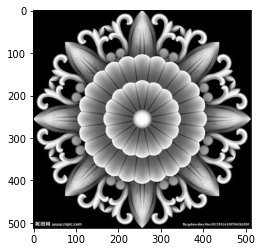

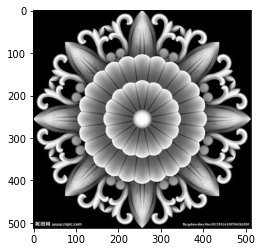

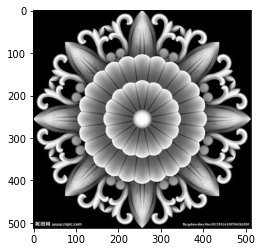

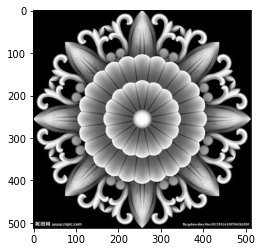

In [20]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


#更改为需要的图片路径
def gray_level(path):
    img = cv2.imread(path, 0)
    h, w = img.shape[0], img.shape[1]

    #处理过程
    new_img = np.zeros((h, w, 8))
    for i in range(h):
        for j in range(w):
            n = str(np.binary_repr(img[i, j], 8))
            for k in range(8):
                new_img[i, j, k] = n[k]


#依次显示
    for i in range(8):
        cv2.imshow('image', new_img[:, :, i])
        cv2.waitKey(0)

def main(path, dpi):
    gray_level(path)
    space_change(path)

dpi = [1000, 500, 100, 1]
main('timg.jpg', dpi)

以上代码结论：涉及到位深度

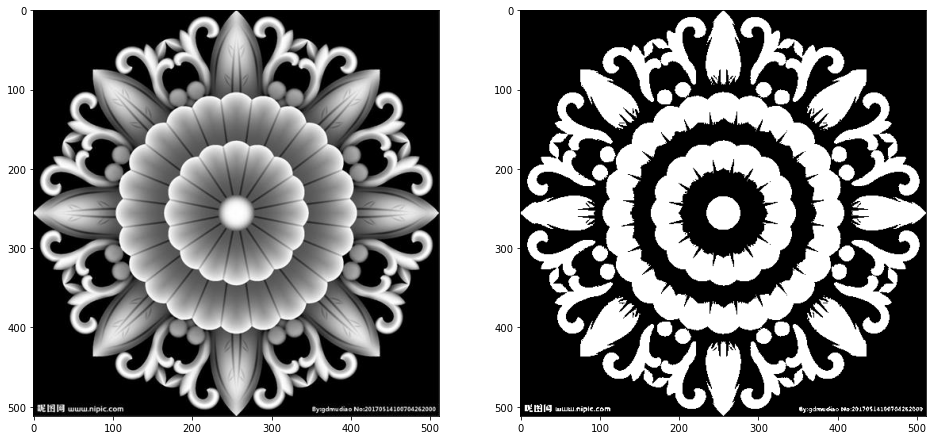

In [21]:
 # 修改为二值图像
import cv2
img = cv2.imread("timg.jpg")
thresh=120
ret,new_img =cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

# 展示图片
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(new_img)
plt.show()

In [ ]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt

# 1. 给定一幅空间分辨率足够大的灰度图像；
gray = cv2.imread("timg.jpg",cv2.IMREAD_UNCHANGED)
 # 均值
shape = gray.shape
mean = gray.sum()/(shape[0] * shape[1] * shape[2])
print(mean)
ret, Reduce_gray_resolution_img = cv2.threshold(gray, mean, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (10,10))
print('降低该图像的灰度分辨率:')
plt.imshow(Reduce_gray_resolution_img, cmap = plt.get_cmap(name = 'gray'))
plt.title('Reduce_gray_resolution_img')
plt.savefig('Reduce_gray_resolution_img')
plt.show()

以上代码结论：cv2.threshold 二值图像

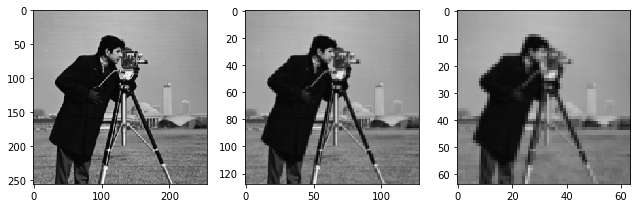

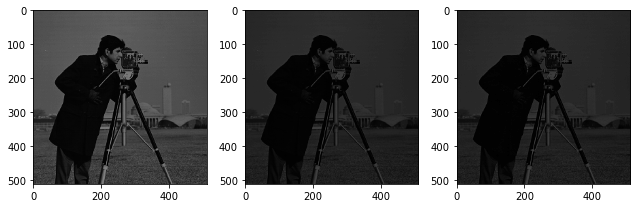

In [36]:
from skimage import io,color,data,transform
import matplotlib.pyplot as plt
import numpy as np

#1.
#导入摄影师的灰度图像
img = data.camera()


#2.
#降低空间分辨率，保持灰度分辨率不变
new_img1 = transform.resize(img, (img.shape[0]/2,img.shape[1]/2))
new_img2 = transform.resize(img, (img.shape[0]/4,img.shape[1]/4))
new_img3 = transform.resize(img, (img.shape[0]/8,img.shape[1]/8))

plt.figure(figsize=(9,3))
plt.subplot(131)
io.imshow(new_img1)
plt.subplot(132)
io.imshow(new_img2)
plt.subplot(133)
io.imshow(new_img3)


#3.
#降低灰度级，保持空间分辨率不变
gray1 = np.uint8(img / 2)   #图像的数据类型是uint8类型，需要转换
gray2 = np.uint8(img / 4)
# gray3 = np.uint8(img / 8)
gray3 = np.floor(img / 8).astype(np.int8) # 两种方法
plt.figure(figsize=(9,3))
plt.subplot(131)
io.imshow(gray1)
plt.subplot(132)
io.imshow(gray2)
plt.subplot(133)
io.imshow(gray3)

np.unit8(img/2) 简洁、漂亮